In [1]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv('A2_final_df.csv')

In [3]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,relative ASA,...,-,B,E,G,H,I,S,T,Acetyl (Protein N-term),Unmodified
0,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,1.000000,...,1,0,0,0,0,0,0,0,1,0
1,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0,0.869231,...,1,0,0,0,0,0,0,0,0,1
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,0.987903,...,1,0,0,0,0,0,0,0,1,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,0.951220,...,1,0,0,0,0,0,0,0,1,0
4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,0.692683,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48293,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,0.088710,...,1,0,0,0,0,0,0,0,0,1
48294,YYTSASGDEMVSLK,P07900,Unmodified,465,478,YYTSASGDEMVSLK,K,478,0,0.707317,...,0,0,0,0,1,0,0,0,0,1
48295,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0,0.790244,...,0,0,0,0,0,0,0,1,0,1
48296,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0,0.415323,...,0,0,1,0,0,0,0,0,0,1


In [4]:
df = df.drop(['secondary_structure'], axis=1)

In [5]:
df.columns.values # get column names

array(['Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE',
       'NH2R', 'NO2E', 'ONH2R', 'ONH2E', 'res_depth', 'ca_depth', 'SASA',
       '-', 'B', 'E', 'G', 'H', 'I', 'S', 'T', 'Acetyl (Protein N-term)',
       'Unmodified'], dtype=object)

In [6]:
df.columns[9:].values # get column names from 10 to end

array(['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE',
       'NH2R', 'NO2E', 'ONH2R', 'ONH2E', 'res_depth', 'ca_depth', 'SASA',
       '-', 'B', 'E', 'G', 'H', 'I', 'S', 'T', 'Acetyl (Protein N-term)',
       'Unmodified'], dtype=object)

In [7]:
labels= df['Cleavage']  # get labels

In [8]:
features= df.iloc[:,9:] # get features

In [9]:
features.shape # get shape of features

(48298, 24)

<AxesSubplot:>

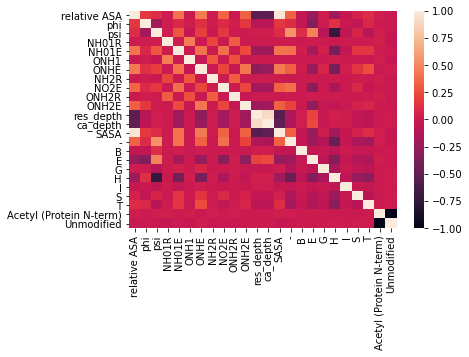

In [10]:
import seaborn as sns # exploratory data analysis
import matplotlib as plt
corr = features.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [11]:
from sklearn.model_selection import train_test_split # split data into train and test sets
X=features  # features
y=np.ravel(labels)  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # split data into train and test sets

In [12]:
from sklearn.preprocessing import StandardScaler # standardize data
scaler = StandardScaler().fit(X_train) # fit scaler to train data
X_train = scaler.transform(X_train) # standardize train data
X_test = scaler.transform(X_test)   # standardize test data

In [16]:
model = Sequential() # create model   
model.add(Dense(64, activation='relu', input_shape=(24,))) # add layer with 8 neurons and relu activation
model.add(Dense(64, activation='relu')) 
model.add(Dense(64, activation='relu')) # add layer with 8 neurons and relu activation
model.add(Dense(1, activation='sigmoid')) # add layer with 1 neuron and sigmoid activation
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) # compile model

In [17]:
model.summary() # print model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1600      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, y_train,epochs=15, batch_size=1000, verbose=1) # train model

Train on 32359 samples
Epoch 1/15
32359/32359 [==============================] - 0s 8us/sample - loss: 0.5619 - acc: 0.8277
Epoch 2/15
32359/32359 [==============================] - 0s 3us/sample - loss: 0.4710 - acc: 0.8692
Epoch 3/15
32359/32359 [==============================] - 0s 3us/sample - loss: 0.4346 - acc: 0.8692
Epoch 4/15
32359/32359 [==============================] - 0s 3us/sample - loss: 0.4193 - acc: 0.8692
Epoch 5/15
32359/32359 [==============================] - 0s 4us/sample - loss: 0.4124 - acc: 0.8692
Epoch 6/15
32359/32359 [==============================] - 0s 4us/sample - loss: 0.4087 - acc: 0.8692
Epoch 7/15
32359/32359 [==============================] - 0s 4us/sample - loss: 0.4062 - acc: 0.8692
Epoch 8/15
32359/32359 [==============================] - 0s 4us/sample - loss: 0.4044 - acc: 0.8692
Epoch 9/15
32359/32359 [==============================] - 0s 4us/sample - loss: 0.4030 - acc: 0.8692
Epoch 10/15
32359/32359 [==============================] - 0s 4us/sa

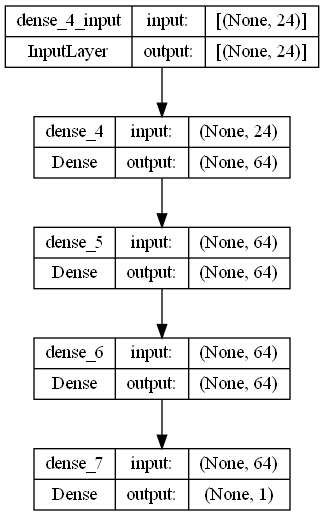

In [19]:
from keras.utils import plot_model 
plot_model(model, to_file='model.png', show_shapes=True) # layer visualization  

In [20]:
y_pred = model.predict(X_test) # predict labels for test data
score = model.evaluate(X_test, y_test,verbose=1) # evaluate model
print(score) 

c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.38821199207056406, 0.8732668]


In [21]:
import shap 

In [22]:
explainer = shap.DeepExplainer(model, X_train) # create explainer
shap_values = explainer.shap_values(X_test) # get shap values for test data

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


You have provided over 5k background samples! For better performance consider using smaller random sample.


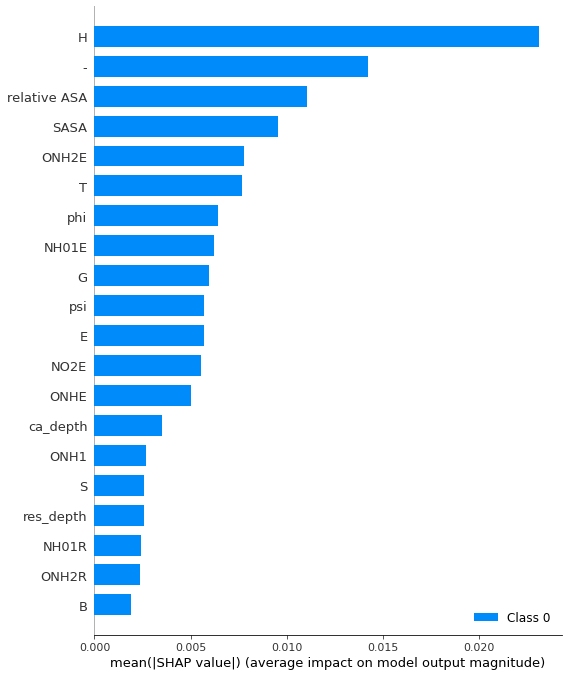

In [23]:
#shap.summary_plot(shap_values[0], plot_type = 'dot', feature_names = features.columns)
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = features.columns) # bar summary plot for shap value

In [24]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0], feature_names = features.columns) # force plot for shap value    

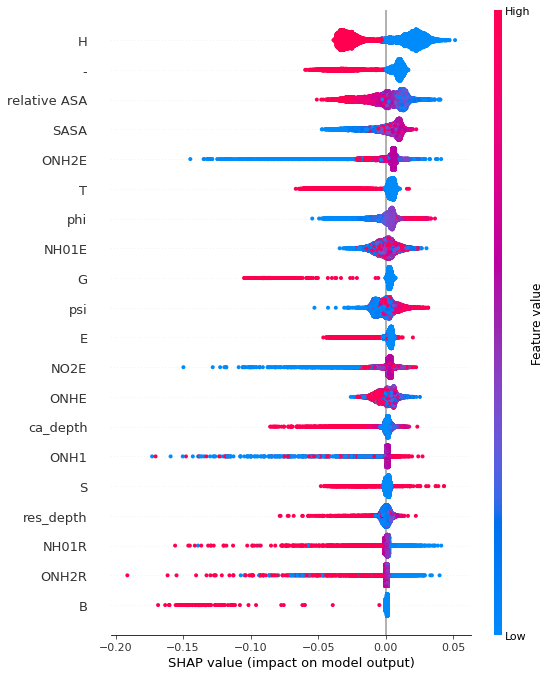

In [25]:
shap.summary_plot(shap_values[0], X_test, feature_names=features.columns, plot_type='dot') # dot summary plot for shap value